Question 1: Binary Classification with Logistic Regression<br>

Description:<br>
Use logistic regression to classify the famous Iris dataset into two classes: Versicolor and Not-Versicolor.

In [1]:
# Write your code from here
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()
X = iris.data
y = (iris.target == 1).astype(int) 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
print("Logistic Regression accuracy:", log_reg.score(X_test, y_test))

Logistic Regression accuracy: 0.7368421052631579


Question 2: Multi-Class Classification with Decision Trees<br>

Description:<br>
Classify the Iris dataset using a Decision Tree classifier and visualize the decision tree.

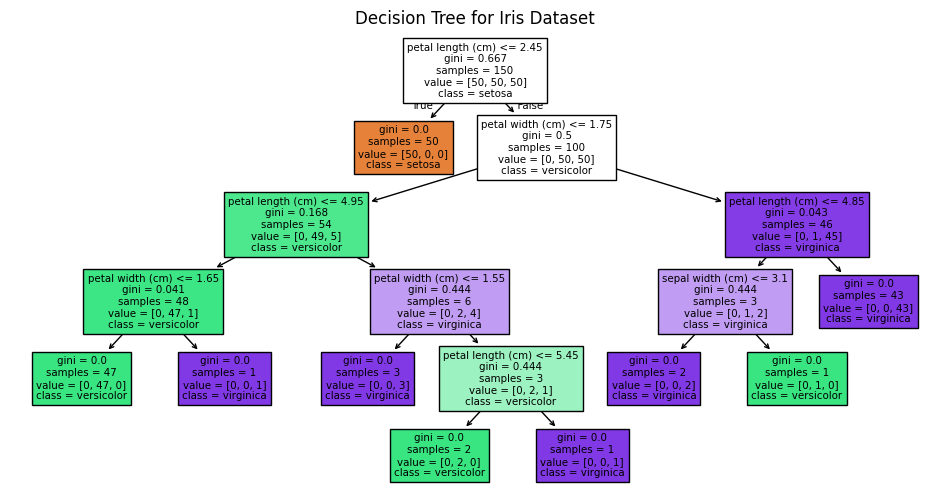

In [2]:
# Write your code from here
X = iris.data
y = iris.target
dt = DecisionTreeClassifier()
dt.fit(X, y)
plt.figure(figsize=(12, 6))
plot_tree(dt, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree for Iris Dataset")
plt.show()


Question 3: K-Nearest Neighbors for Binary Classification<br>

Description:<br>
Use K-Nearest Neighbors to classify the Breast Cancer dataset into two classes: Malignant and Benign.

In [3]:
# Write your code from here
bc = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("KNN accuracy:", knn.score(X_test, y_test))

KNN accuracy: 0.965034965034965


Question 4: Evaluate Classification Model using Confusion Matrix<br>

Description:<br>
Evaluate the performance of the K-Nearest Neighbors classifier from Question 3 using a
confusion matrix.

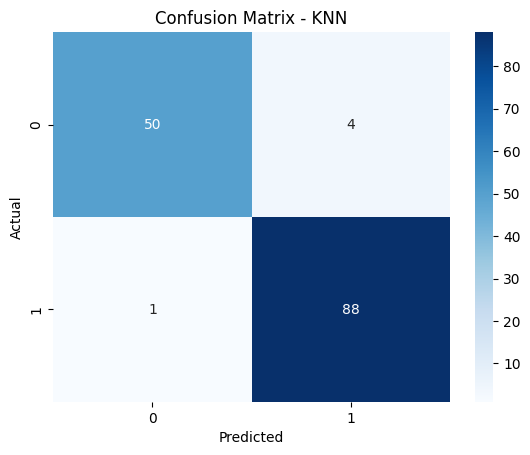

In [4]:
# Write your code from here
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Question 5: SVM Classifier for Multi-Class Classification<br>

Description:<br>
Classify the Wine dataset using Support Vector Machine and check the model's performance.

In [5]:
# Write your code from here
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=42)
svm = SVC()
svm.fit(X_train, y_train)
print("SVM accuracy on Wine dataset:", svm.score(X_test, y_test))

SVM accuracy on Wine dataset: 0.7111111111111111


Question 6: Precision, Recall, and F1-Score<br>

Description:<br>
Calculate precision, recall, and F1-score for the SVM model trained on the Wine dataset.

In [6]:
# Write your code from here
y_pred = svm.predict(X_test)
print("Classification Report for SVM on Wine dataset:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

Classification Report for SVM on Wine dataset:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        15
     class_1       0.62      0.72      0.67        18
     class_2       0.44      0.33      0.38        12

    accuracy                           0.71        45
   macro avg       0.69      0.69      0.68        45
weighted avg       0.70      0.71      0.70        45



Question 7: Random Forest for Binary Classification with Feature Importance<br>

Description:<br>
Train a Random Forest classifier on the Breast Cancer dataset and display feature
importances.

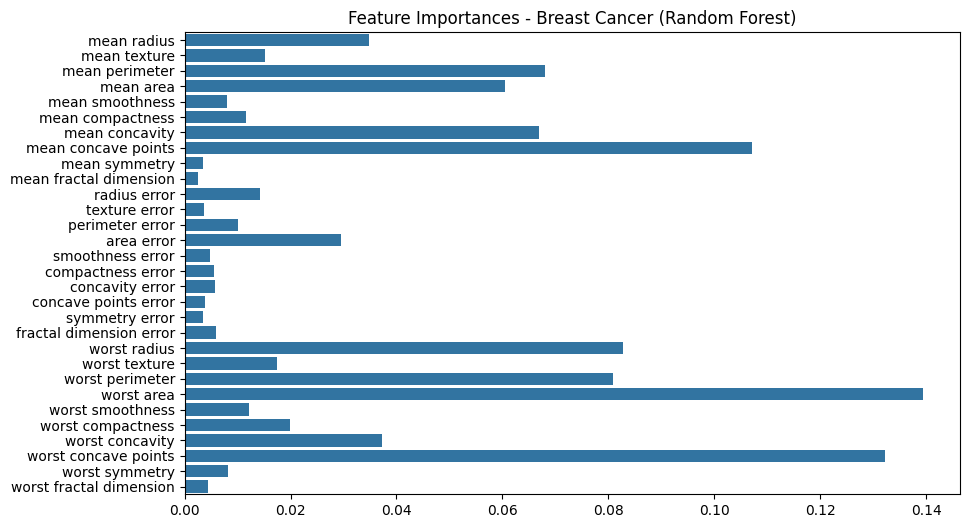

In [7]:
# Write your code from here
rf = RandomForestClassifier(random_state=42)
rf.fit(bc.data, bc.target)
importances = rf.feature_importances_
feature_names = bc.feature_names
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances - Breast Cancer (Random Forest)")
plt.show()

Question 8: ROC-AUC Curve for Binary Classification<br>

Description:<br>
Plot the ROC-AUC curve for the Random Forest model on the Breast Cancer dataset.

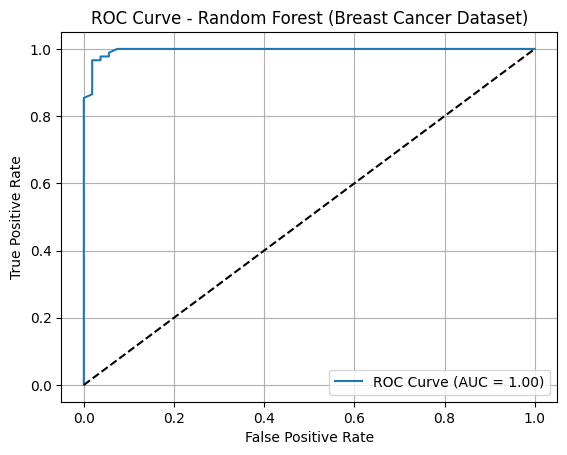

In [11]:
# Write your code from here
from sklearn.metrics import roc_curve, auc
bc = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_prob = rf.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (Breast Cancer Dataset)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Question 9: Hyperparameter Tuning with Grid Search for SVM Classifier<br>

Description:<br>
Perform hyperparameter tuning on the SVM classifier for the Wine dataset using GridSearchCV.

In [9]:
# Write your code from here
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(wine.data, wine.target)
print("Best parameters for SVM (Wine):", grid.best_params_)
print("Best accuracy:", grid.best_score_)

Best parameters for SVM (Wine): {'C': 0.1, 'kernel': 'linear'}
Best accuracy: 0.961111111111111


Question 10: Ensemble Learning using Voting Classifier<br>

Description:<br>
Combine different classifiers to form a voting ensemble and classify the Iris dataset.

In [10]:
# Write your code from here
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)
clf1 = LogisticRegression(max_iter=200)
clf2 = DecisionTreeClassifier()
clf3 = KNeighborsClassifier()
voting_clf = VotingClassifier(estimators=[
    ('lr', clf1), ('dt', clf2), ('knn', clf3)
], voting='hard')
voting_clf.fit(X_train, y_train)
print("Voting Classifier accuracy:", voting_clf.score(X_test, y_test))

Voting Classifier accuracy: 1.0
